In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Accounts-Receivable.csv")

In [ ]:
df.nunique().to_frame(name='Unique values')

,Unique values
countryCode,5
customerID,100
PaperlessDate,91
invoiceNumber,2466
InvoiceDate,681
DueDate,681
InvoiceAmount,2098
Disputed,2
SettledDate,695
PaperlessBill,2


In [ ]:
df.rename(columns={'countryCode': 'customer_Account_Number'}, inplace=True)
df['customerID'] = df['customerID'].str.split('-', n=1).str[0]

In [ ]:
df.head()

,customer_Account_Number,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [ ]:
df.drop('PaperlessDate', axis=1, inplace=True)
df['DueDate'] = pd.to_datetime(df['DueDate'])  # Convert DueDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['due_days'] = (df['DueDate'] - df['InvoiceDate']).dt.days

columns = list(df.columns)
columns.insert(columns.index('DueDate') + 1, 'due_days')
df = df[columns]
df.head()

,customer_Account_Number,customerID,invoiceNumber,InvoiceDate,DueDate,due_days,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,due_days
0,391,0379,611365,2013-01-02,2013-02-01,30,55.94,No,1/15/2013,Paper,13,0,30
1,406,8976,7900770,2013-01-26,2013-02-25,30,61.74,Yes,3/3/2013,Electronic,36,6,30
2,391,2820,9231909,2013-07-03,2013-08-02,30,65.88,No,7/8/2013,Electronic,5,0,30
3,406,9322,9888306,2013-02-10,2013-03-12,30,105.92,No,3/17/2013,Electronic,35,5,30
4,818,6627,15752855,2012-10-25,2012-11-24,30,72.27,Yes,11/28/2012,Paper,34,4,30


In [ ]:
df.rename(columns={'SettledDate': 'invoice_paid_Date'}, inplace=True)

<ipython-input-6-98a477fa49fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'SettledDate': 'invoice_paid_Date'}, inplace=True)


In [ ]:
# Convert columns to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])
df['invoice_paid_Date'] = pd.to_datetime(df['invoice_paid_Date'])

def update_year(date, year_difference):
    try:
        return date.replace(year=date.year + year_difference)
    except ValueError:
        # For invalid dates (like Feb 29 in a non-leap year), adjust to Feb 28
        return date.replace(year=date.year + year_difference, day=28)


# Calculate the difference to shift the year
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: update_year(x, 10))
df['DueDate'] = df['DueDate'].apply(lambda x: update_year(x, 10))
df['invoice_paid_Date'] = df['invoice_paid_Date'].apply(lambda x: update_year(x, 10))

# Display the updated dataframe
print(df)

      customer_Account_Number customerID  invoiceNumber InvoiceDate  \
0                         391       0379         611365  2023-01-02   
1                         406       8976        7900770  2023-01-26   
2                         391       2820        9231909  2023-07-03   
3                         406       9322        9888306  2023-02-10   
4                         818       6627       15752855  2022-10-25   
...                       ...        ...            ...         ...   
2461                      391       6708     9982796720  2023-10-18   
2462                      391       9841     9983237240  2022-09-19   
2463                      770       7856     9986249860  2022-07-02   
2464                      770       7050     9989225541  2022-04-27   
2465                      406       9758     9990243864  2023-07-04   

        DueDate  due_days  InvoiceAmount Disputed invoice_paid_Date  \
0    2023-02-01        30          55.94       No        2023-01-15   
1    

In [ ]:
df['DueDate'] = pd.to_datetime(df['DueDate'])

# Function to filter rows by the year
def filter_by_year(df, year):
    return df[df['DueDate'].apply(lambda x: x.year == year)]

# Filter for each year
year_2023 = filter_by_year(df, 2023)
year_2022 = filter_by_year(df, 2022)
year_2024 = filter_by_year(df, 2024)

<ipython-input-9-c88d3e882f26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[2022,2023,2024], y=[year_2022['DaysLate'].sum(), year_2023['DaysLate'].sum(), year_2024['DaysLate'].sum()],palette = 'Blues', saturation=.5)


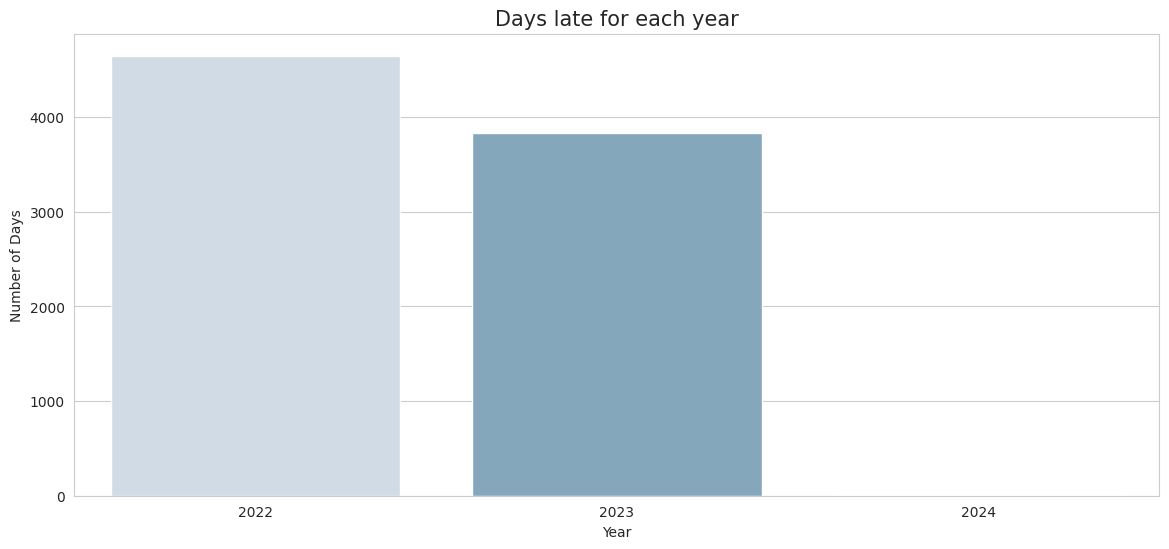

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=[2022,2023,2024], y=[year_2022['DaysLate'].sum(), year_2023['DaysLate'].sum(), year_2024['DaysLate'].sum()],palette = 'Blues', saturation=.5)
plt.title('Days late for each year', fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.show()

<ipython-input-10-c6259bbc5b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022['DaysLate'] = pd.to_numeric(year_2022['DaysLate'], errors='coerce')
<ipython-input-10-c6259bbc5b38>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=items, palette = 'Blues', saturation=.5)


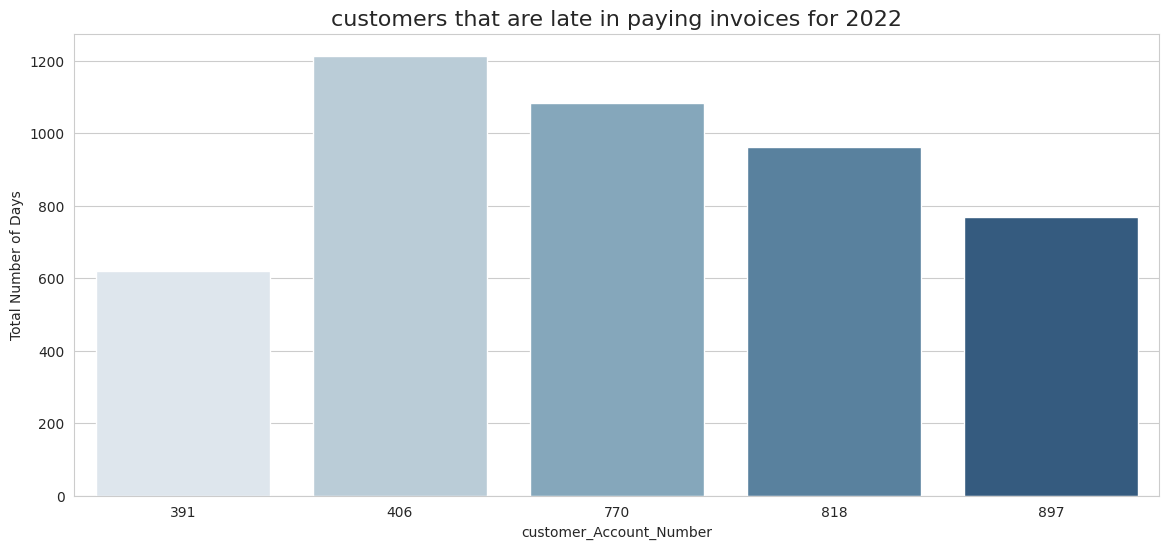

In [ ]:


year_2022['DaysLate'] = pd.to_numeric(year_2022['DaysLate'], errors='coerce')


grouped = year_2022.groupby(['customer_Account_Number']).sum(numeric_only=True)['DaysLate']

# Extract the keys (customer_Account_Number) and values (sum of DaysLate)
keys = list(grouped.index)
items = list(grouped.values)

plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=keys, y=items, palette = 'Blues', saturation=.5)
plt.title('customers that are late in paying invoices for 2022', fontsize = 16)
plt.ylabel('Total Number of Days')
plt.xlabel('customer_Account_Number')
plt.show()

<ipython-input-11-d2e109f3abb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023['DaysLate'] = pd.to_numeric(year_2023['DaysLate'], errors='coerce')
<ipython-input-11-d2e109f3abb1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=items, palette = 'Blues', saturation=.5)


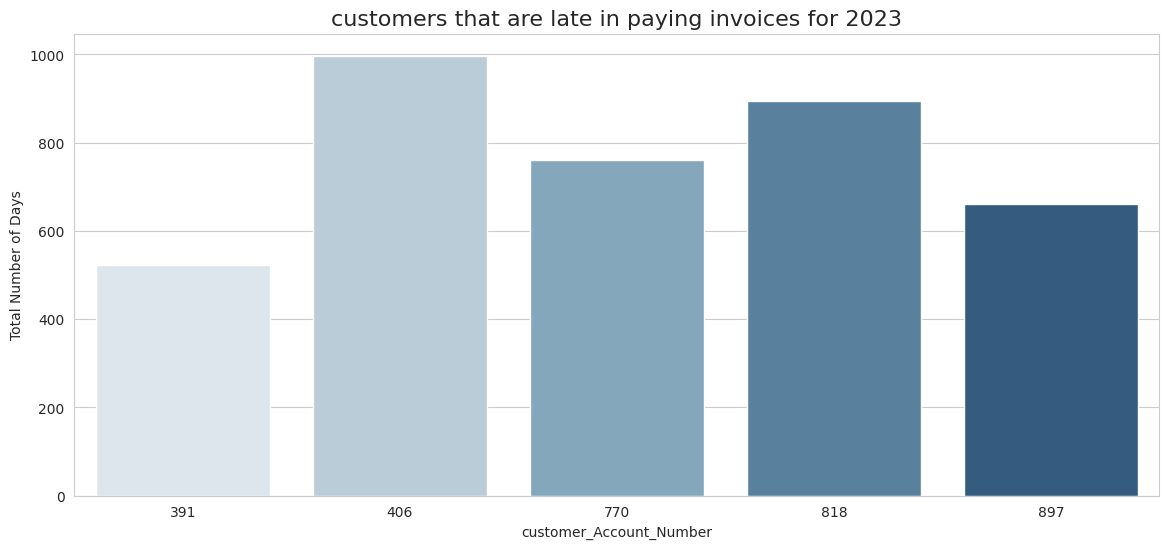

In [ ]:


year_2023['DaysLate'] = pd.to_numeric(year_2023['DaysLate'], errors='coerce')


grouped = year_2023.groupby(['customer_Account_Number']).sum(numeric_only=True)['DaysLate']

# Extract the keys (customer_Account_Number) and values (sum of DaysLate)
keys = list(grouped.index)
items = list(grouped.values)

plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=keys, y=items, palette = 'Blues', saturation=.5)
plt.title('customers that are late in paying invoices for 2023', fontsize = 16)
plt.ylabel('Total Number of Days')
plt.xlabel('customer_Account_Number')
plt.show()

<ipython-input-12-99c21c897f1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2024['DaysLate'] = pd.to_numeric(year_2024['DaysLate'], errors='coerce')
<ipython-input-12-99c21c897f1f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=items, palette = 'Blues', saturation=.5)


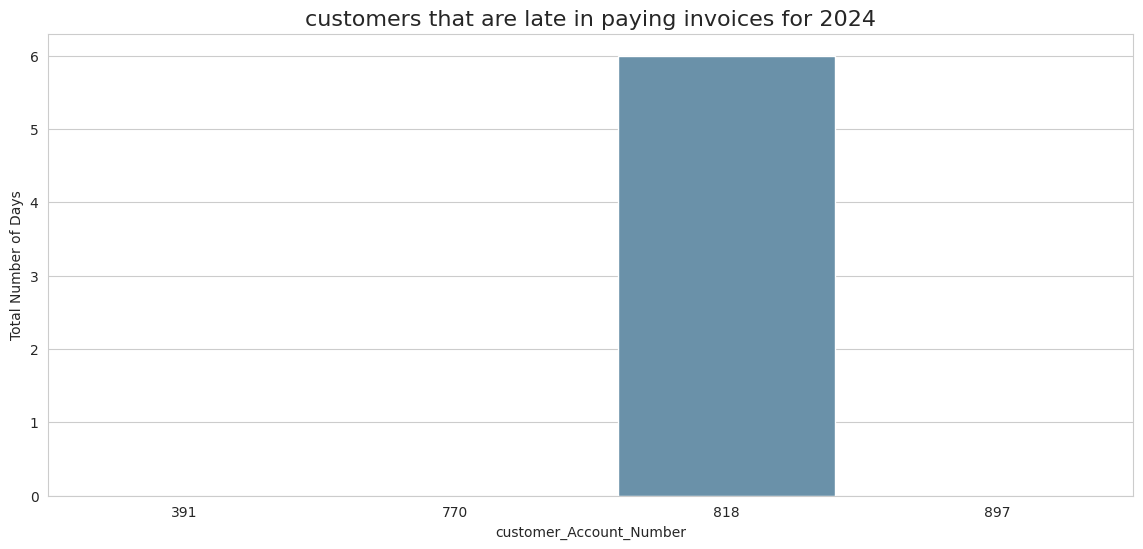

In [ ]:


year_2024['DaysLate'] = pd.to_numeric(year_2024['DaysLate'], errors='coerce')


grouped = year_2024.groupby(['customer_Account_Number']).sum(numeric_only=True)['DaysLate']

# Extract the keys (customer_Account_Number) and values (sum of DaysLate)
keys = list(grouped.index)
items = list(grouped.values)

plt.figure(figsize = (14,6))
sns.set_style('whitegrid')

sns.barplot(x=keys, y=items, palette = 'Blues', saturation=.5)
plt.title('customers that are late in paying invoices for 2024', fontsize = 16)
plt.ylabel('Total Number of Days')
plt.xlabel('customer_Account_Number')
plt.show()

<ipython-input-13-cf97cec088a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_Account_Number', y='InvoiceAmount', data=filtered_df, palette='viridis')


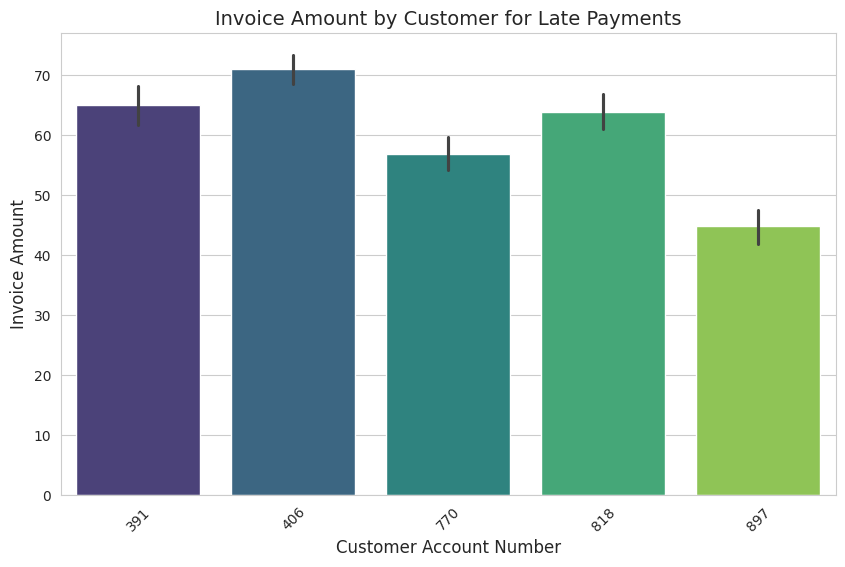

In [ ]:
# Filter the rows where DaysLate > 0
filtered_df = df[df['DaysLate'] > 0]

# Plot InvoiceAmount against customer_Account_Number
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_Account_Number', y='InvoiceAmount', data=filtered_df, palette='viridis')

# Add labels and title
plt.title('Invoice Amount by Customer for Late Payments', fontsize=14)
plt.xlabel('Customer Account Number', fontsize=12)
plt.ylabel('Invoice Amount', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Changing the type of columns to use pandas time properties
df.drop('Disputed', axis=1, inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])
df['invoice_paid_Date'] = pd.to_datetime(df['invoice_paid_Date'])

date_columns = ['InvoiceDate','DueDate','invoice_paid_Date']



df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day

df['DueDate_year'] = df['DueDate'].dt.year
df['DueDate_month'] = df['DueDate'].dt.month
df['DueDate_day'] = df['DueDate'].dt.day

df['invoice_paid_Date_year'] = df['invoice_paid_Date'].dt.year
df['invoice_paid_Date_month'] = df['invoice_paid_Date'].dt.month
df['invoice_paid_Date_day'] = df['invoice_paid_Date'].dt.day



df.head()

,customer_Account_Number,customerID,invoiceNumber,InvoiceDate,DueDate,due_days,InvoiceAmount,invoice_paid_Date,PaperlessBill,DaysToSettle,...,due_days,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,DueDate_year,DueDate_month,DueDate_day,invoice_paid_Date_year,invoice_paid_Date_month,invoice_paid_Date_day
0,391,0379,611365,2023-01-02,2023-02-01,30,55.94,2023-01-15,Paper,13,...,30,2023,1,2,2023,2,1,2023,1,15
1,406,8976,7900770,2023-01-26,2023-02-25,30,61.74,2023-03-03,Electronic,36,...,30,2023,1,26,2023,2,25,2023,3,3
2,391,2820,9231909,2023-07-03,2023-08-02,30,65.88,2023-07-08,Electronic,5,...,30,2023,7,3,2023,8,2,2023,7,8
3,406,9322,9888306,2023-02-10,2023-03-12,30,105.92,2023-03-17,Electronic,35,...,30,2023,2,10,2023,3,12,2023,3,17
4,818,6627,15752855,2022-10-25,2022-11-24,30,72.27,2022-11-28,Paper,34,...,30,2022,10,25,2022,11,24,2022,11,28


In [ ]:
df.drop(['customerID','invoiceNumber','invoice_paid_Date','InvoiceDate','DueDate'], axis = 1, inplace = True) # Remove an unimportant column

In [ ]:
category = ['customer_Account_Number']
encoded_categ = pd.get_dummies(df[category] ,drop_first=True)

#df['Disputed'] = df['Disputed'].replace({'Yes':1, 'No':0})
df['PaperlessBill'] = df['PaperlessBill'].replace({'Electronic':1, 'Paper':0})

#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)


# Dropping the categorical features
df = df.drop(columns = category, axis = 1)

df.head()

<ipython-input-16-42228105cb49>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaperlessBill'] = df['PaperlessBill'].replace({'Electronic':1, 'Paper':0})


,due_days,InvoiceAmount,PaperlessBill,DaysToSettle,DaysLate,due_days,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,DueDate_year,DueDate_month,DueDate_day,invoice_paid_Date_year,invoice_paid_Date_month,invoice_paid_Date_day
0,30,55.94,0,13,0,30,2023,1,2,2023,2,1,2023,1,15
1,30,61.74,1,36,6,30,2023,1,26,2023,2,25,2023,3,3
2,30,65.88,1,5,0,30,2023,7,3,2023,8,2,2023,7,8
3,30,105.92,1,35,5,30,2023,2,10,2023,3,12,2023,3,17
4,30,72.27,0,34,4,30,2022,10,25,2022,11,24,2022,11,28


In [ ]:
from sklearn.metrics import explained_variance_score,r2_score
from time import time

# Used Models
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Measure the efficiency of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.impute import SimpleImputer # For missing data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Select Features
features = df.drop(columns =['DaysLate'], axis = 1)

#Select Target
target = df['DaysLate']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (1972, 14)
Shape of testing feature: (494, 14)
Shape of training label: (1972,)
Shape of testing label: (494,)


In [ ]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.009s
	Prediction time: 0.018s
	Explained variance: 0.8860860557073678
	Mean absolute error: 0.9919028340080972
	Mean squared error: 4.7478542510121455
	R2 score: 0.8851181927428918

GradientBoostingRegressor()
	Training time: 0.377s
	Prediction time: 0.001s
	Explained variance: 0.9979559150415706
	Mean absolute error: 0.09175821804419979
	Mean squared error: 0.0921493294278999
	R2 score: 0.997770301921136

KNeighborsRegressor()
	Training time: 0.008s
	Prediction time: 0.017s
	Explained variance: 0.8860860557073678
	Mean absolute error: 0.9919028340080972
	Mean squared error: 4.7478542510121455
	R2 score: 0.8851181927428918

ExtraTreesRegressor()
	Training time: 0.217s
	Prediction time: 0.008s
	Explained variance: 0.9990277786756512
	Mean absolute error: 0.12912955465587045
	Mean squared error: 0.05619210526315789
	R2 score: 0.9986403435604964

RandomForestRegressor()
	Training time: 0.386s
	Prediction time: 0.011s
	Explained variance: 0.997985311

In [ ]:
cert_model = RandomForestRegressor()
cert_model.fit(X_train, y_train)
cert_y_pred = list(model.predict(X_test))

y_test = list(y_test)
print('Comparing The Results \n')

for i in range(1,11):
    print(i,') ', 'Test:',y_test[i], ' Prediction:', round(cert_y_pred[i]))

Comparing The Results 

1 )  Test: 0  Prediction: 2
2 )  Test: 0  Prediction: -4
3 )  Test: 0  Prediction: 1
4 )  Test: 10  Prediction: 9
5 )  Test: 15  Prediction: 11
6 )  Test: 0  Prediction: -2
7 )  Test: 0  Prediction: 0
8 )  Test: 0  Prediction: 3
9 )  Test: 0  Prediction: 2
10 )  Test: 0  Prediction: 2


In [ ]:
final_model = RandomForestRegressor()


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf              }
print(random_grid)

{'n_estimators': [200, 600, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 60, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
from sklearn.model_selection import GridSearchCV


# define search
search = GridSearchCV(final_model, random_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3)

# execute search
result = search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.7614038650532592
Best Hyperparameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


In [ ]:
final_model = RandomForestRegressor(max_depth = 10, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200 )
final_model.fit(X_train, y_train)
final_pred = list(final_model.predict(X_test))

print("\tExplained variance:", explained_variance_score(y_test, final_pred))
print("\tMean absolute error:", mean_absolute_error(y_test, final_pred))
print("\tMean squared error:", mean_squared_error(y_test, final_pred))
print("\tR2 score:", r2_score(y_test, final_pred))

	Explained variance: 0.937636033165467
	Mean absolute error: 0.8300461522809462
	Mean squared error: 2.579986971650184
	R2 score: 0.9375731540327336


In [ ]:
print('Comparing The Results \n')

for i in range(1,11):
    print(i,') ', 'Test:',y_test[i], ' Prediction:', round(final_pred[i]))

Comparing The Results 

1 )  Test: 0  Prediction: 1
2 )  Test: 0  Prediction: 0
3 )  Test: 0  Prediction: 0
4 )  Test: 10  Prediction: 11
5 )  Test: 15  Prediction: 13
6 )  Test: 0  Prediction: 0
7 )  Test: 0  Prediction: 0
8 )  Test: 0  Prediction: 1
9 )  Test: 0  Prediction: 0
10 )  Test: 0  Prediction: 0


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from time import time
import numpy as np

# Define regressors
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

# Perform cross-validation for each model
head = 10
cv_folds = 5  # Number of cross-validation folds
scoring = make_scorer(mean_squared_error)  # Define scoring metric

for model in regressors[:head]:
    start = time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error', n_jobs=-1)
    train_time = time() - start
    start = time()
    model.fit(X_train, y_train)  # Fit on the whole training set after cross-validation
    y_pred = model.predict(X_test)
    predict_time = time() - start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tCross-Validation MSE:", -np.mean(cv_scores))  # Cross-validation mean squared error
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tMean squared error:", mean_squared_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()








KNeighborsRegressor()
	Training time: 0.138s
	Prediction time: 0.030s
	Cross-Validation MSE: 6.818196491678982
	Explained variance: 0.8860860557073678
	Mean absolute error: 0.9919028340080972
	Mean squared error: 4.7478542510121455
	R2 score: 0.8851181927428918

GradientBoostingRegressor()
	Training time: 2.350s
	Prediction time: 0.379s
	Cross-Validation MSE: 0.07309649037141505
	Explained variance: 0.9979501346551353
	Mean absolute error: 0.09186502473427022
	Mean squared error: 0.09240380788800805
	R2 score: 0.9977641444142161

ExtraTreesRegressor()
	Training time: 1.131s
	Prediction time: 0.350s
	Cross-Validation MSE: 0.09521355561267111
	Explained variance: 0.9990493525793313
	Mean absolute error: 0.12862348178137656
	Mean squared error: 0.054969230769230784
	R2 score: 0.9986699329338182

RandomForestRegressor()
	Training time: 2.320s
	Prediction time: 0.572s
	Cross-Validation MSE: 0.11118152207158005
	Explained variance: 0.9980241557236287
	Mean absolute error: 0.09222672064777328

In [ ]:
# Hyperparameter tuning with GridSearchCV for RandomForestRegressor
final_model = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=3)]
# Number of features to consider at every split
max_features = ['sqrt']  # Changed from 'auto' to 'sqrt' to prevent error
# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(10, 110, num=3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

{'n_estimators': [200, 600, 1000], 'max_features': ['sqrt'], 'max_depth': [10, 60, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:

# Hyperparameter tuning with GridSearchCV
search = GridSearchCV(final_model, random_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv_folds)
result = search.fit(X_train, y_train)

# Best parameters and score from GridSearchCV
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.7063981580243741
Best Hyperparameters: {'max_depth': 110, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


In [ ]:
# Final model predictions with the best parameters
cert_model = RandomForestRegressor(**result.best_params_)
cert_model.fit(X_train, y_train)
cert_y_pred = list(cert_model.predict(X_test))
print('Comparing The Results \n')

for i in range(1,11):
    print(i,') ', 'Test:',y_test[i], ' Prediction:', round(final_pred[i]))
# Compare the results
print('Comparing The Results \n')
for i in range(1, 11):
    print(i, ') ', 'Test:', y_test[i], ' Prediction:', round(cert_y_pred[i]))

Comparing The Results 



KeyError: 1